In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.drop('User ID', axis=1,inplace= True)

In [10]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [11]:
df=pd.get_dummies(df, drop_first= True)

In [12]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [13]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [15]:
x

array([[-1.78179743, -1.49004624, -0.74593581],
       [-0.25358736, -1.46068138, -0.74593581],
       [-1.11320552, -0.78528968, -0.74593581],
       ...,
       [ 1.17910958, -1.46068138,  1.34059793],
       [-0.15807423, -1.07893824, -0.74593581],
       [ 1.08359645, -0.99084367,  1.34059793]])

In [17]:
y.shape

(400,)

In [19]:
Y= y.reshape(-1)

In [21]:
Y.shape

(400,)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [28]:
##to find k value using train and trail method
acc_list =[]
err_list =[]
for i in range(1,25):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_list.append(acc)
    err_list.append(1-acc)


In [30]:
acc_list

[0.5,
 0.51,
 0.51,
 0.54,
 0.54,
 0.47,
 0.51,
 0.52,
 0.52,
 0.54,
 0.58,
 0.58,
 0.62,
 0.58,
 0.63,
 0.58,
 0.59,
 0.59,
 0.59,
 0.57,
 0.54,
 0.53,
 0.52,
 0.52]

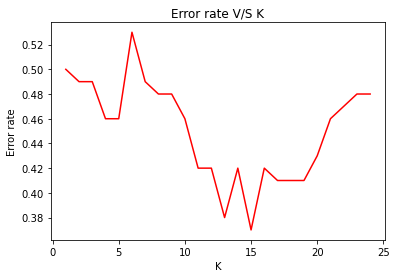

In [34]:
plt.plot(list(range(1,25)),err_list,c='r')
plt.title('Error rate V/S K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [40]:
model = KNeighborsClassifier(n_neighbors=15)

In [41]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [42]:
y_pred = model.predict(x_test)

In [43]:
confusion_matrix(y_test,y_pred)

array([[30, 21],
       [16, 33]], dtype=int64)

In [44]:
accuracy_score(y_test,y_pred)

0.63